In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

In [2]:
#Loading dataset
df = pd.read_csv('/content/cleveland_heart_disea.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


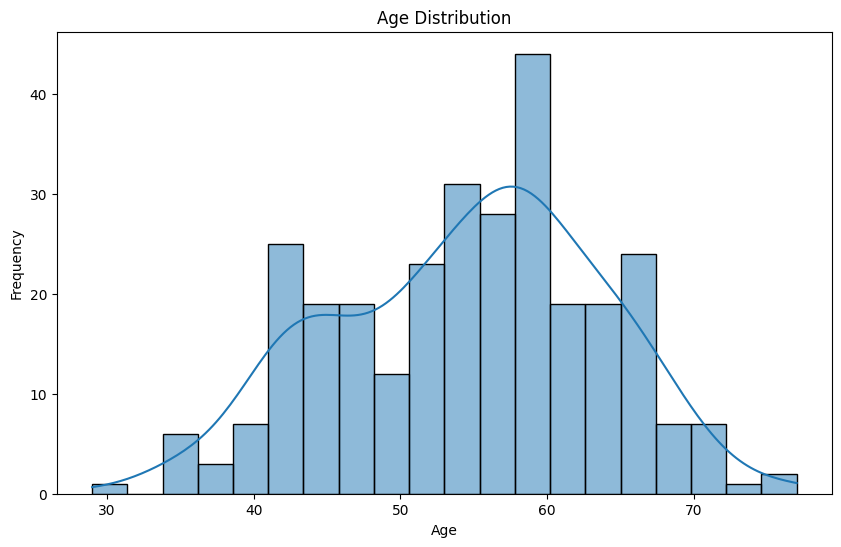

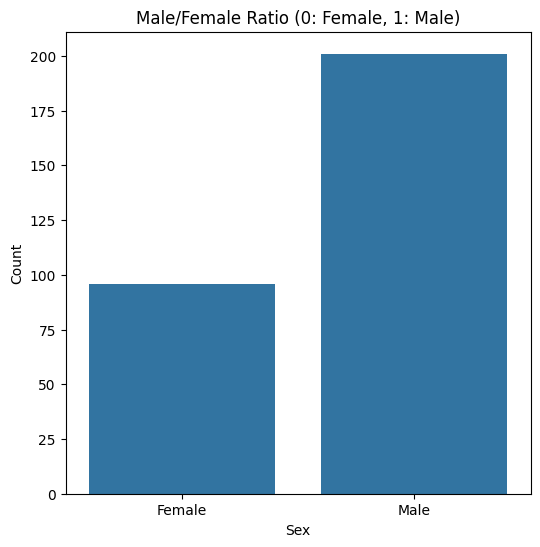

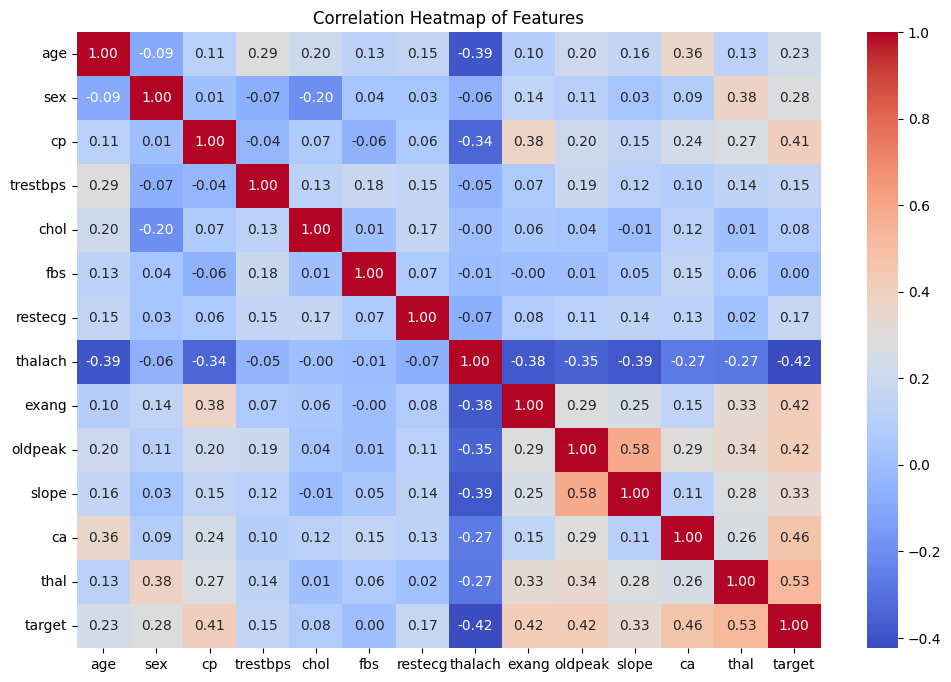

In [3]:
#EDA
# Checking age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Checking male/female ratio
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=df)
plt.title('Male/Female Ratio (0: Female, 1: Male)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Fiinding target
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [4]:
#Preprocessing
# Separating target variable
X = df.drop('target', axis=1)
y = df['target']

# Identifying numerical and categorical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Creating preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Createing column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)
print("Original data shape:", X.shape)
print("Processed training data shape:", X_train_processed.shape)
print("Processed testing data shape:", X_test_processed.shape)

Original data shape: (297, 13)
Processed training data shape: (237, 28)
Processed testing data shape: (60, 28)


In [5]:
# Building Model
# 1. SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_processed, y_train)
y_pred = svm_model.predict(X_test_processed)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60


Confusion Matrix:
[[32  4]
 [ 2 22]]


In [6]:
#2. Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_processed, y_train)
y_pred_logreg = logreg_model.predict(X_test_processed)

# Evaluating the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.83

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.77      0.83      0.80        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60


Logistic Regression Confusion Matrix:
[[30  6]
 [ 4 20]]


In [7]:
#3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.87

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60


Random Forest Confusion Matrix:
[[31  5]
 [ 3 21]]


In [8]:
#4. XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_processed, y_train)
y_pred_xgb = xgb_model.predict(X_test_processed)

# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.83

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.77      0.83      0.80        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60


XGBoost Confusion Matrix:
[[30  6]
 [ 4 20]]


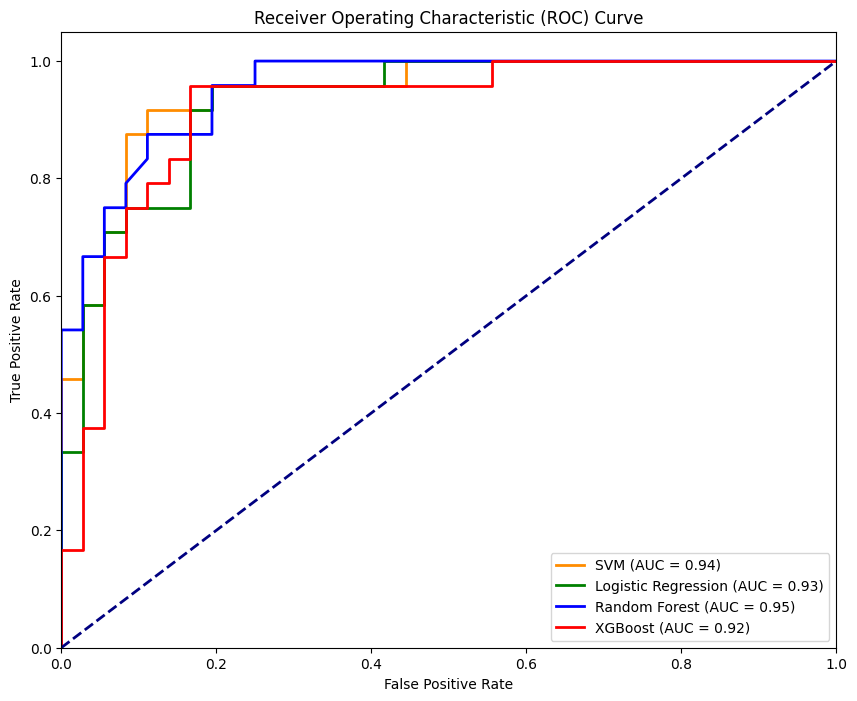

In [9]:
#Visualzation
y_prob_svm = svm_model.predict_proba(X_test_processed)[:, 1] if hasattr(svm_model, 'predict_proba') else svm_model.decision_function(X_test_processed)
y_prob_logreg = logreg_model.predict_proba(X_test_processed)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test_processed)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test_processed)[:, 1]

# Calculating ROC curve and AUC for each model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
# Using best model for prediction
sample_data = X_test_processed[0].reshape(1, -1)
predicted_target = svm_model.predict(sample_data)

print(f"The predicted target for the sample data is: {predicted_target[0]}")

The predicted target for the sample data is: 0


In [11]:
import joblib
joblib.dump(svm_model, "svm_model.pkl")
print("SVM model saved as svm_model.pkl")

SVM model saved as svm_model.pkl
